In [1]:
#Importamos las librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../Datos/diabetes.csv')
df.head()

,embarazos,glucosa,presion,grosor_piel,insulina,imc,pedigri,edad,diabetes
0,4,94,65,22,0,24.7,148.0,21,0
1,3,111,62,0,0,22.6,142.0,21,0
2,3,90,78,0,0,42.7,559.0,21,0
3,3,87,60,18,0,21.8,444.0,21,0
4,2,100,64,23,0,29.7,368.0,21,0


In [5]:
#Reemplazar el Outcome de 1 a 'Diab' y 0 a 'Non-Diab'

df.diabetes = df.diabetes.replace({0:'Non-Diab',1:'Diab'})
df.head()

,embarazos,glucosa,presion,grosor_piel,insulina,imc,pedigri,edad,diabetes
0,4,94,65,22,0,24.7,148.0,21,Non-Diab
1,3,111,62,0,0,22.6,142.0,21,Non-Diab
2,3,90,78,0,0,42.7,559.0,21,Non-Diab
3,3,87,60,18,0,21.8,444.0,21,Non-Diab
4,2,100,64,23,0,29.7,368.0,21,Non-Diab


In [6]:
#Renombrar la columna DiabetesPedigreeFunction a DPF
df.pedigri = df.rename({'pedigri':'DPF'},inplace = True,axis =1)
df.head()

,embarazos,glucosa,presion,grosor_piel,insulina,imc,DPF,edad,diabetes
0,4,94,65,22,0,24.7,148.0,21,Non-Diab
1,3,111,62,0,0,22.6,142.0,21,Non-Diab
2,3,90,78,0,0,42.7,559.0,21,Non-Diab
3,3,87,60,18,0,21.8,444.0,21,Non-Diab
4,2,100,64,23,0,29.7,368.0,21,Non-Diab


In [7]:
#Verificamos los tipos de datos
df.dtypes

embarazos        int64
glucosa          int64
presion          int64
grosor_piel      int64
insulina         int64
imc            float64
DPF            float64
edad             int64
diabetes        object
dtype: object

In [9]:
#Convertir a la variable: DPF en Integer y verificar su correcta conversion

df["DPF"] = pd.to_numeric(df["DPF"])

embarazos        int64
glucosa          int64
presion          int64
grosor_piel      int64
insulina         int64
imc            float64
DPF            float64
edad             int64
diabetes        object
dtype: object

In [10]:
#Validacion cambio de dato

df.dtypes

embarazos        int64
glucosa          int64
presion          int64
grosor_piel      int64
insulina         int64
imc            float64
DPF            float64
edad             int64
diabetes        object
dtype: object

In [22]:
#Shape
df.shape

(768, 9)

In [23]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    object 
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 54.1+ KB


In [15]:
#Estadisticos básicos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0


<Figure size 720x480 with 0 Axes>

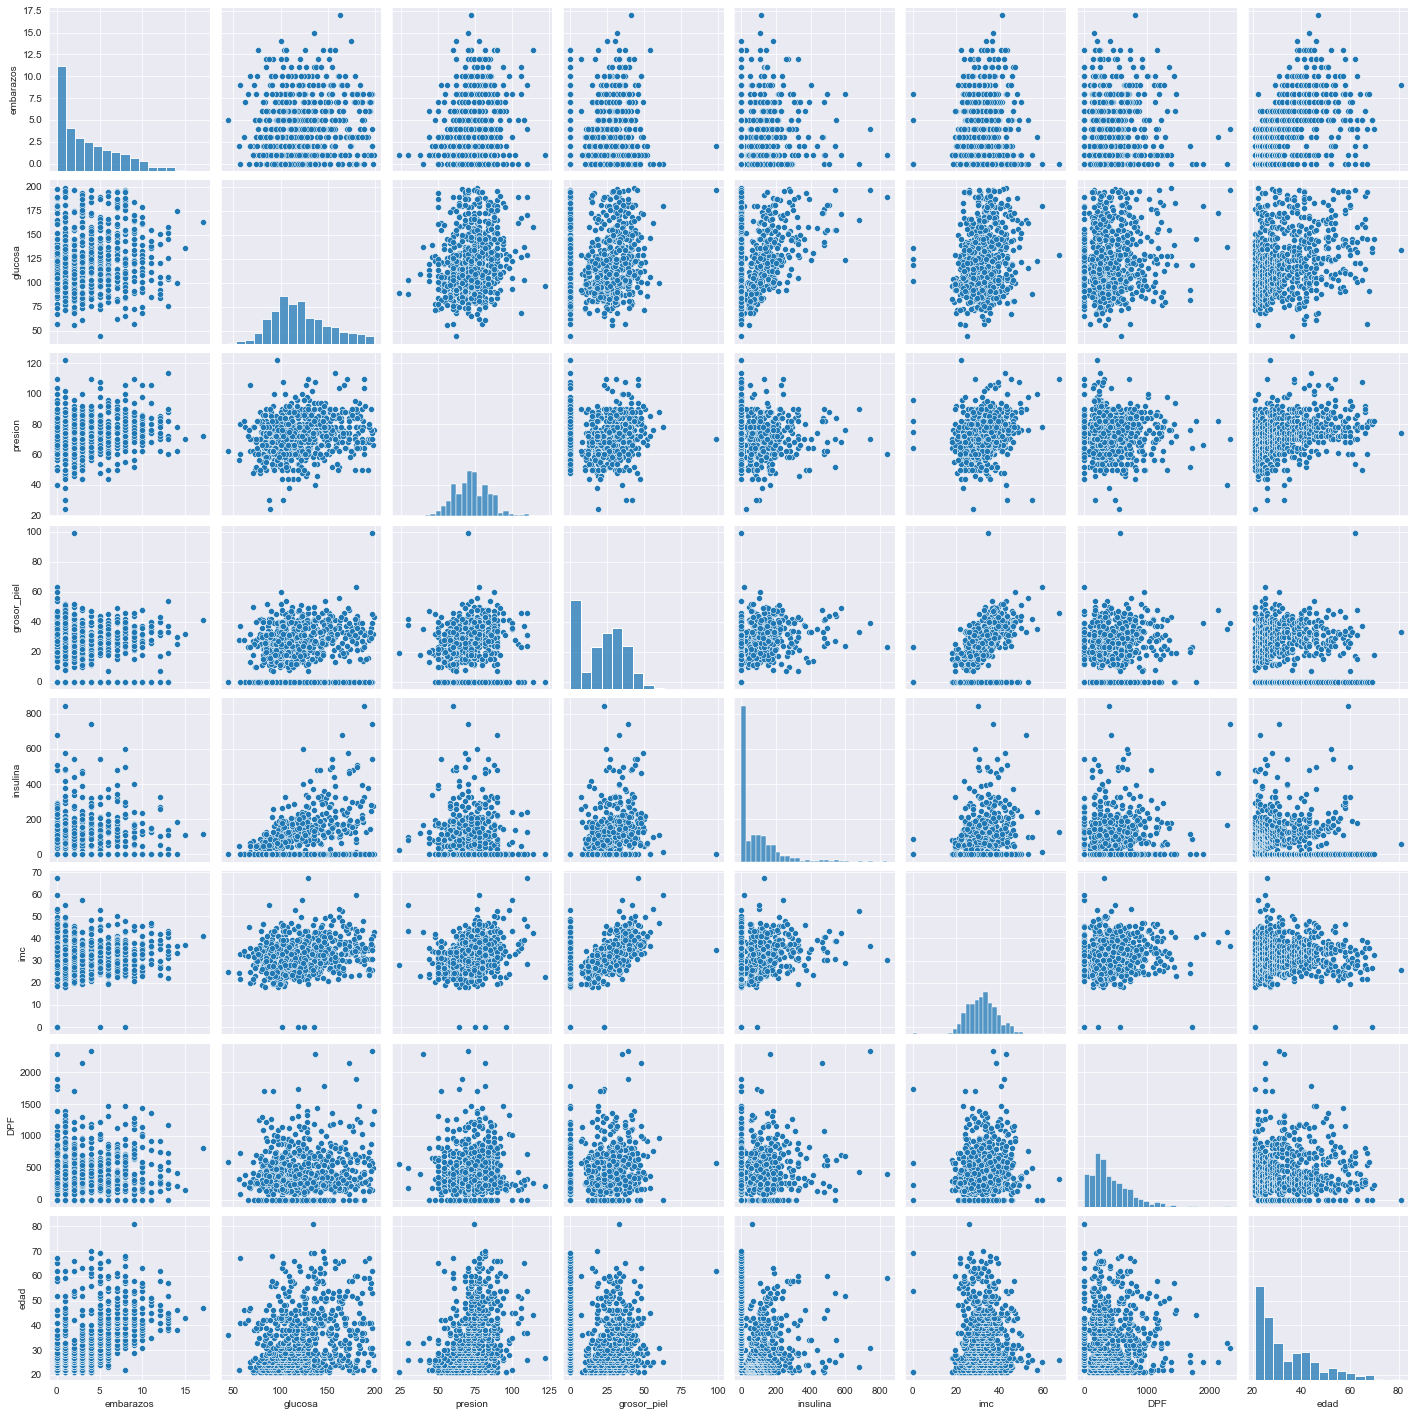

In [11]:
#Crear un Pairplot del dataset

plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

<Figure size 720x480 with 0 Axes>

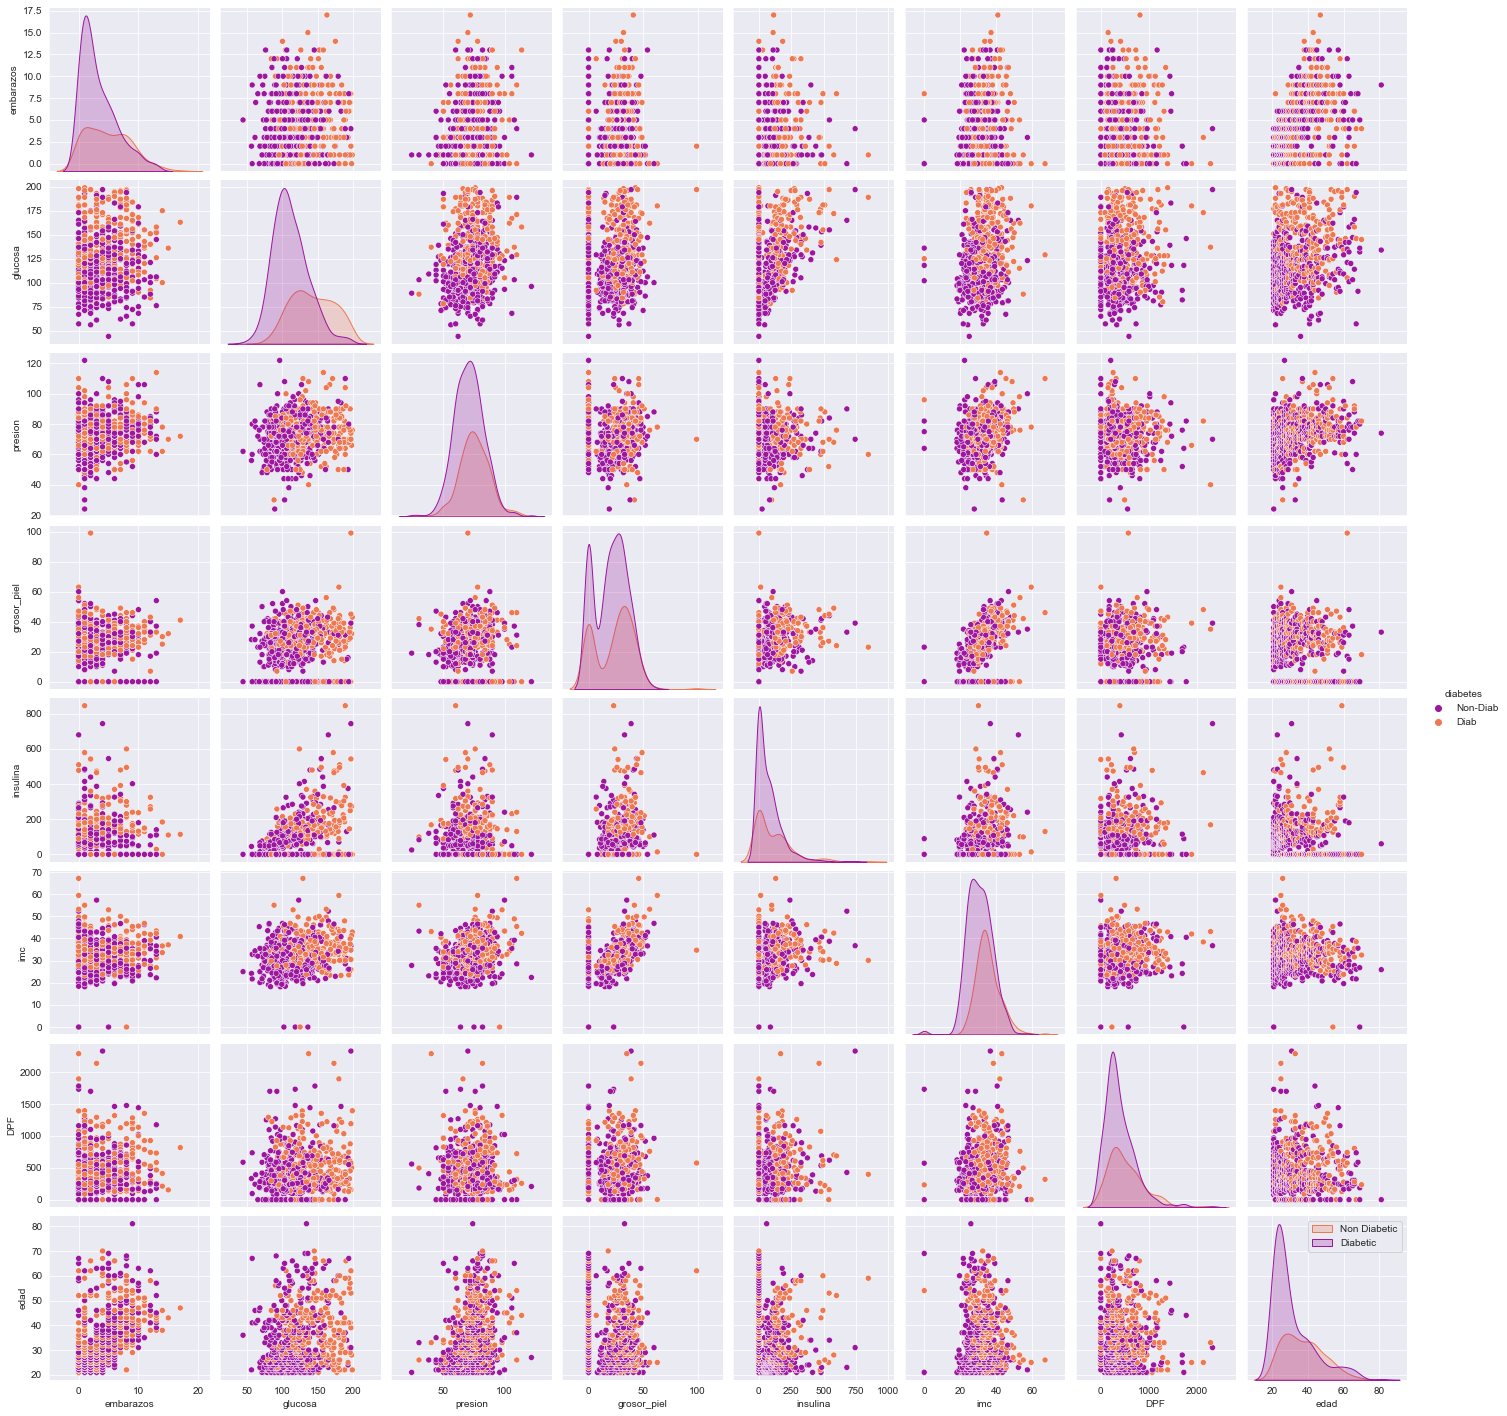

In [12]:
#Crear el Pairplot pero ahora con el atributo hue = 'Outcome'. Las leyendas deberán decir: 'Non Diabetic','Diabetic'

plt.figure(dpi = 120)
sns.pairplot(df,hue = 'diabetes',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

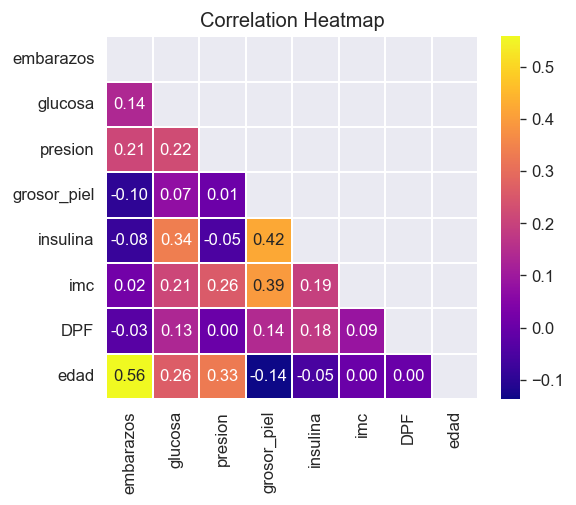

In [13]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
df

,embarazos,glucosa,presion,grosor_piel,insulina,imc,DPF,edad,diabetes
0,4,94,65,22,0,24.7,148.00,21,Non-Diab
1,3,111,62,0,0,22.6,142.00,21,Non-Diab
2,3,90,78,0,0,42.7,559.00,21,Non-Diab
3,3,87,60,18,0,21.8,444.00,21,Non-Diab
4,2,100,64,23,0,29.7,368.00,21,Non-Diab
...,...,...,...,...,...,...,...,...,...
723,8,91,82,0,0,35.6,587.00,68,Non-Diab
724,5,132,80,0,0,26.8,186.00,69,Non-Diab
725,5,136,82,0,0,0.0,0.64,69,Non-Diab
726,4,145,82,18,0,32.5,235.00,70,Diab


Joint plot de Glucosa con otras variables ==> 

Correlacion entre Glucosa y embarazos ==>  0.13606727898088153


<Figure size 500x400 with 0 Axes>

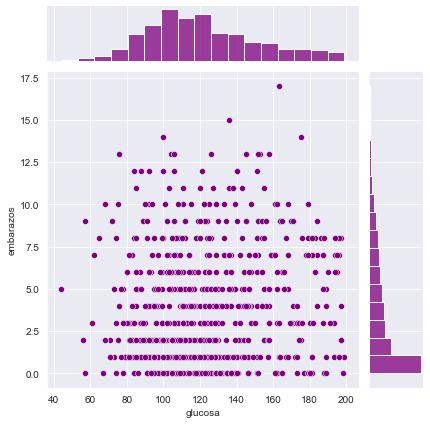

Correlacion entre Glucosa y presion ==>  0.22319177824954156


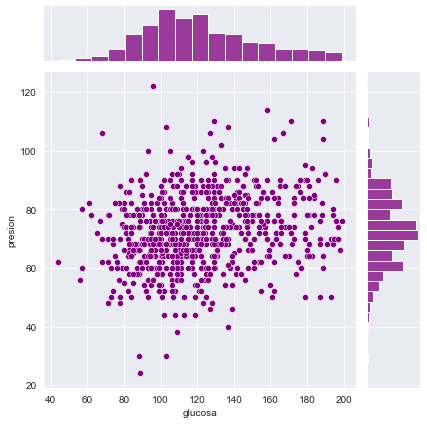

Correlacion entre Glucosa y grosor_piel ==>  0.07299683405739762


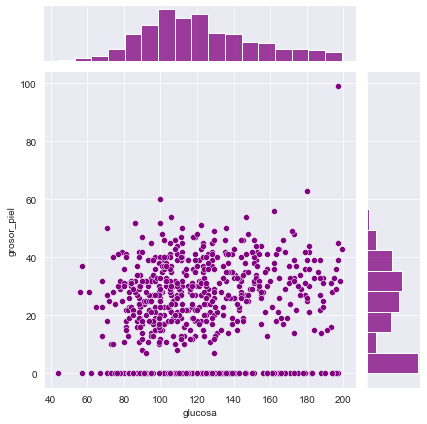

Correlacion entre Glucosa y insulina ==>  0.33745810472726134


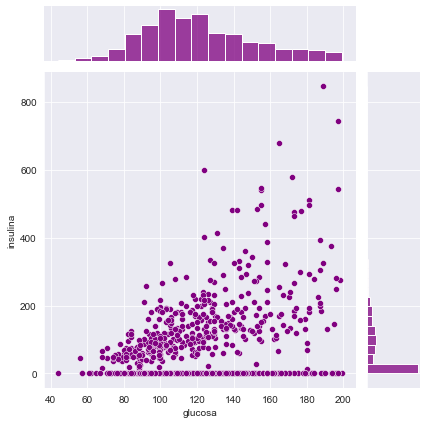

Correlacion entre Glucosa y imc ==>  0.21197204958872873


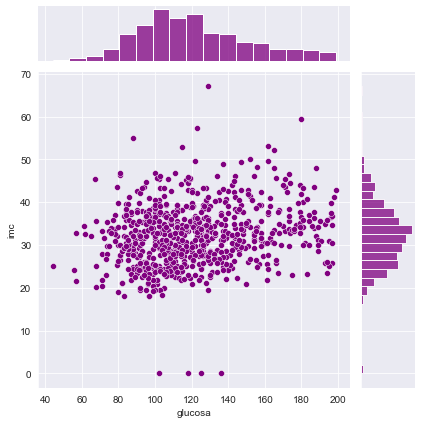

Correlacion entre Glucosa y DPF ==>  0.13253008835406568


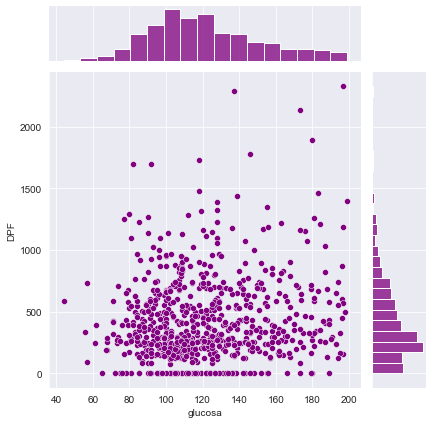

Correlacion entre Glucosa y edad ==>  0.26410566183309625


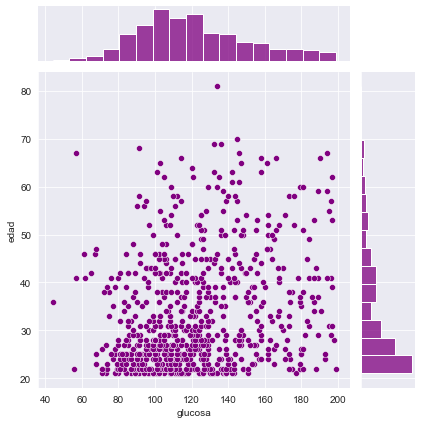

In [20]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'glucosa' and i != 'diabetes':
        print(f"Correlacion entre Glucosa y {i} ==> ",df.corr().loc['glucosa'][i])
        sns.jointplot(x='glucosa',y=i,data=df,color = 'purple')
        plt.show()

**Insight**: La glucosa muestra una asociación lineal débil positiva con las otras variables del conjunto de datos. Eso significa que al aumentar el nivel de glucosa en los pacientes, también aumentarán las otras variables.

Joint plot de BloodPressure con otras variables ==> 

Correlacion entre BloodPressure y grosor_piel ==>  0.006629336761352353


<Figure size 500x400 with 0 Axes>

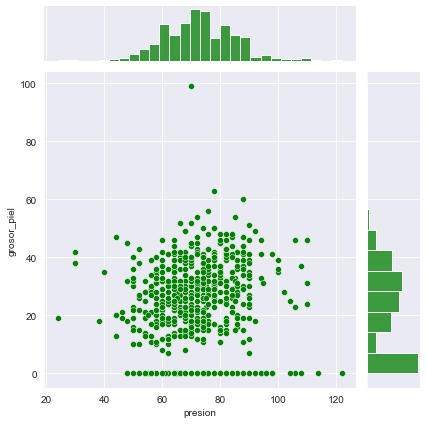

Correlacion entre BloodPressure y insulina ==>  -0.04955529953604395


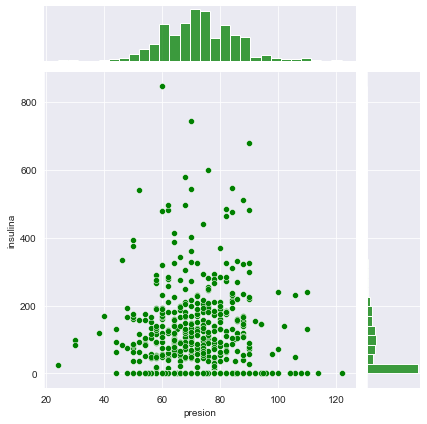

Correlacion entre BloodPressure y imc ==>  0.25692023666336766


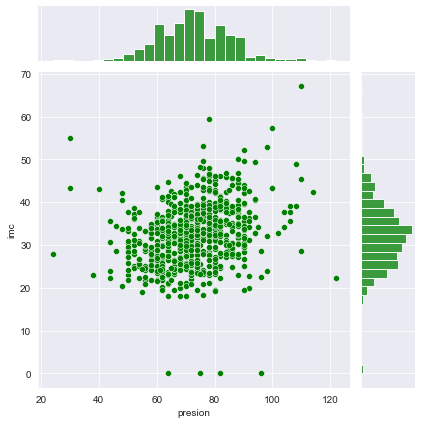

Correlacion entre BloodPressure y DPF ==>  0.003300521390646554


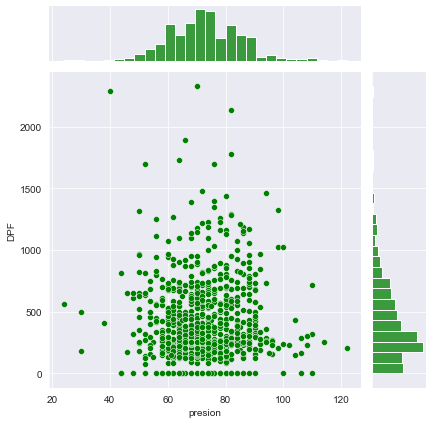

Correlacion entre BloodPressure y edad ==>  0.3290840870723199


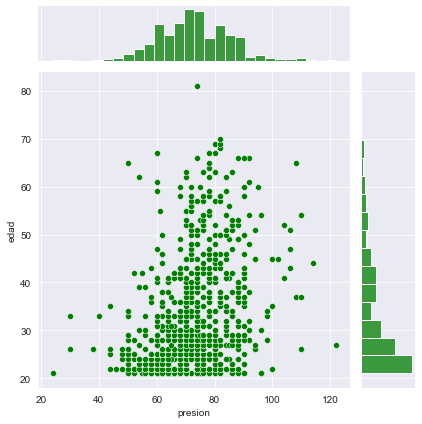

In [23]:
#Crear el join plot entre BloodPressure y el resto de las variables con su correspondiente interpretación.

#Crear el join plot entre BloodPressure y el resto de las variables con su correspondiente interpretación.

col = list(df.columns)
idx = col.index('presion')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de BloodPressure con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre BloodPressure y {col[i]} ==> ",df.corr().loc['presion'][col[i]])
    sns.jointplot(x='presion',y=col[i],data=df,color = 'green')
    plt.show()

**Insight**: Completar.

Joint plot de SkinThickness con otras variables ==> 

Correlacion entre SkinThickness y insulina ==>  0.42195096465371723


<Figure size 500x400 with 0 Axes>

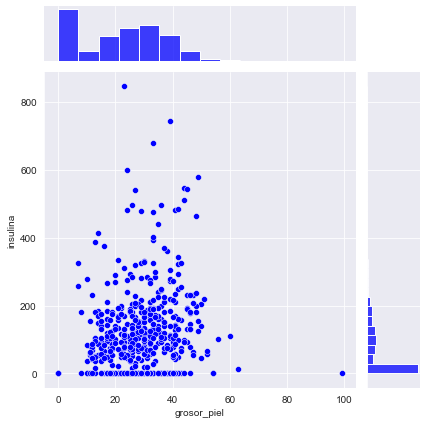

Correlacion entre SkinThickness y imc ==>  0.3934927919376424


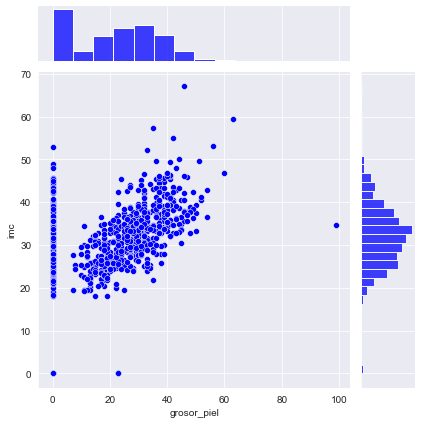

Correlacion entre SkinThickness y DPF ==>  0.14118037770896405


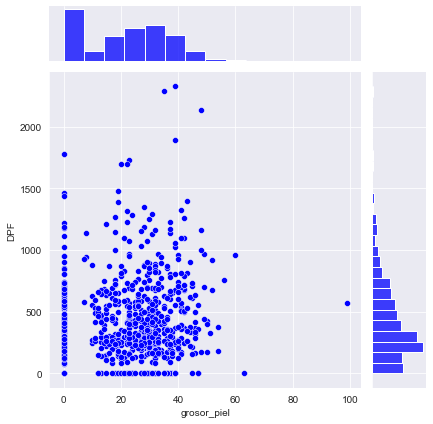

Correlacion entre SkinThickness y edad ==>  -0.13649073145945437


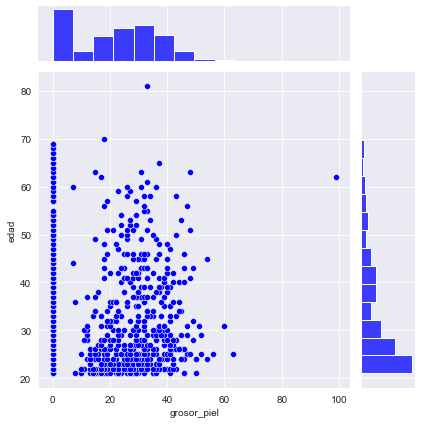

In [24]:
#Crear el join plot entre SkinThickness y el resto de las variables con su correspondiente interpretación.

col = list(df.columns)
idx = col.index('grosor_piel')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de SkinThickness con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre SkinThickness y {col[i]} ==> ",df.corr().loc['grosor_piel'][col[i]])
    sns.jointplot(x='grosor_piel',y=col[i],data=df,color = 'blue')
    plt.show()

**Insight**: Completar.